## Visualizing-Food-Insecurity-with-Pixie-Dust-and-Watson-Analytics
_IBM Journey showing how to visualize US Food Insecurity with Pixie Dust and Watson Analytics._

Often in data science we do a great deal of work to glean insights that have an impact on society or a subset of it and yet, often, we end up not communicating our findings or communicating them ineffectively to non data science audiences. That's where visualizations become the most powerful. By visualizing our insights and predictions, we, as data scientists and data lovers, can make a real impact and educate those around us that might not have had the same opportunity to work on a project of the same subject. By visualizing our findings and those insights that have the most power to do social good, we can bring awareness and maybe even change. This Code Pattern walks you through how to do just that, with IBM's Data Science Experience (DSX), Pandas, Pixie Dust and Watson Analytics.

For this particular Code Pattern, food insecurity throughout the US is focused on. Low access, diet-related diseases, race, poverty, geography and other factors are considered by using open government data. For some context, this problem is a more and more relevant problem for the United States as obesity and diabetes rise and two out of three adult Americans are considered obese, one third of American minors are considered obsese, nearly ten percent of Americans have diabetes and nearly fifty percent of the African American population have heart disease. Even more, cardiovascular disease is the leading global cause of death, accounting for 17.3 million deaths per year, and rising. Native American populations more often than not do not have grocery stores on their reservation... and all of these trends are on the rise. The problem lies not only in low access to fresh produce, but food culture, low education on healthy eating as well as racial and income inequality.

The government data that I use in this journey has been conveniently combined into a dataset for our use, which you can find in this repo under combined_data.csv. You can find the original, government data from the US Bureau of Labor Statistics https://www.bls.gov/cex/ and The United States Department of Agriculture https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/.

### What is DSX, Pixie Dust and Watson Analytics and why should I care enough about them to use them for my visualizations?

IBM's Data Science Experience, or DSX, is an online browser platform where you can use notebooks or R Studio for your data science projects. DSX is unique in that it automatically starts up a Spark instance for you, allowing you to work in the cloud without any extra work. DSX also has open data available to you, which you can connect to your notebook. There are also other projects available, in the form of notebooks, which you can follow along with and apply to your own use case. DSX also lets you save your work, share it and collaborate with others, much like I'm doing now!

Pixie Dust is a visualization library you can use on DSX. It is already installed into DSX and once it's imported, it only requires one line of code (two words) to use. With that same line of code, you can pick and choose different values to showcase and visualize in whichever way you want from matplotlib, seaborn and bokeh. If you have geographic data, you can also connect to google maps and Mapbox, depending on your preference. Check out a tutorial on Pixie Dust here: https://ibm-watson-data-lab.github.io/pixiedust/displayapi.html#introduction

IBM's Watson Analytics is another browser platform which allows you to input your data, conduct analysis on it and then visualize your findings. If you're new to data science, Watson recommends connections and visualizations with the data it has been given. These visualizations range from bar and scatter plots to predictive spirals, decision trees, heatmaps, trend lines and more. The Watson platform then allows you to share your findings and visualizations with others, completing your pipeline. Check out my visualizations with the link further down in the notebook, or in the images in this repo.

### Let's start with DSX.

Here's a tutorial on getting started with DSX: https://datascience.ibm.com/docs/content/analyze-data/creating-notebooks.html.

To summarize the introduction, you must first make an account and log in. Then, you can create a project (I titled mine: "Diet-Related Disease"). From there, you'll be able to add data and start a notebook. To begin, I used the combined_data.csv as my data asset. You'll want to upload it as a data asset and once that is complete, go into your notebook in the edit mode (click on the pencil icon next to your notebook on the dashboard). To load your data in your notebook, you'll click on the "1001" data icon in the top right. The combined_data.csv should show up. Click on it and select "Insert Pandas Data Frame". Once you do that, a whole bunch of code will show up in your first cell. Once you see that, run the cell and follow along with my tutorial!

_Quick Note: In Github you can view all of the visualizations by selecting the circle with the dash in the middle at the top right of the notebook!_

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Insert Pandas Data Frame
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_3ebc7942f56c4334ae3dfda7d1f19d40 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-9FQb_5uaEltHpWcqXkeVsFIShUoUOJht768ihN-VgYq',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3ebc7942f56c4334ae3dfda7d1f19d40.get_object(Bucket='testpixiestorage302e1eb2addc4a09a8e6c82f7f1ae0e3',Key='combined_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (208,209,211,214) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
0,0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
1,1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
2,2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
3,3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
4,4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432


### Cleaning data and Exploring

This notebook starts out as a typical data science pipeline: exploring what our data looks like and cleaning the data. Though this is often considered the boring part of the job, it is extremely important. Without clean data, our insights and visualizations could be inaccurate or unclear. 

To initially explore, I used matplotlib to see a correlation matrix of our original data. I also looked at some basic statistics to get a feel for what kind of data we are looking at. I also went ahead and plotted using pandas and seaborn to make bar plots, scatterplots and regression plots. You can also find the meanings of the values at the following link in my repo: https://github.com/IBM/visualize-food-insecurity/blob/mjmyers/data/Variable%20list.xlsx.

In [3]:
df_data_1.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_CHILD10', 'PCT_LACCESS_CHILD10',
       ...
       'CES_WATRPSCQ_std', 'CES_WATRPSPQ_std', 'CES_WELFAREB_std',
       'CES_WELFAREI_std', 'CES_WINDOWAC_std', 'CES_WOMGRLCQ_std',
       'CES_WOMGRLPQ_std', 'CES_WOMSIXCQ_std', 'CES_WOMSIXPQ_std',
       'CES_YRBUILT_std'],
      dtype='object', length=1244)

In [4]:
df_data_1.describe()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
count,3262.000000,3262.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,2763.000000,2763.000000,1947.000000,2763.000000,2763.0,2763.000000,2763.000000,2763.000000,2763.000000,2681.000000
mean,1630.500000,31457.332925,20130.485391,23.540300,5541.030150,8.359188,4953.676750,5.502879,2677.821025,3.909622,...,69.546993,101.138452,1.353149,10.882370,0.0,121.350532,212.334189,106.390781,186.085924,26.350572
std,941.802616,16375.524971,51254.806435,20.231676,13849.378974,8.212651,13155.181390,4.875273,6519.993517,4.212330,...,10.964508,17.466676,0.890585,4.850197,0.0,26.669356,50.179029,28.662127,48.519222,6.232962
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.659691,54.544706,0.000000,0.000000,0.0,48.651029,112.399808,45.121029,80.583433,14.443555
25%,815.250000,19025.500000,1667.390111,10.870622,594.754831,3.432434,365.454006,2.402381,276.850179,1.571591,...,60.690423,93.305506,0.707107,9.020905,0.0,100.291943,180.070768,84.852601,157.478670,23.432432
50%,1630.500000,30038.000000,4111.042854,19.632762,1493.722478,6.144888,943.385306,4.439335,677.791776,2.821919,...,69.896994,99.236682,1.453463,10.442407,0.0,118.376545,209.956745,103.297270,180.653472,24.837942
75%,2445.750000,47006.500000,12919.813770,29.573087,4575.061517,10.318850,3005.860479,6.957564,1857.917995,4.505219,...,75.516632,110.731651,2.065591,14.550488,0.0,135.030235,232.887939,119.926255,217.244568,28.118544
max,3261.000000,72153.000000,886068.668386,100.000001,292541.789025,72.274456,260308.794094,34.015595,78922.918719,29.208633,...,106.552781,153.465998,2.638870,22.275774,0.0,200.919016,376.288907,189.674002,363.251444,54.306640


In [5]:
#to see columns distinctly and evaluate their state
df_data_1['PCT_LACCESS_POP10'].unique()

array([ 33.7696573 ,  19.3184726 ,  20.84097171, ...,  20.22041443,
        10.91540662,  17.20994869])

In [6]:
df_data_1['PCT_REDUCED_LUNCH10'].unique()

array([  6.88610662,   5.54233978,   4.58214007, ...,  12.14804723,
        16.24668435,   7.57430489])

In [7]:
df_data_1['PCT_DIABETES_ADULTS10'].unique()

array([ 11.8,  14.2,  11.1,  14. ,  17.5,  16. ,  13.9,  15. ,  13.6,
        12.5,  17.3,  15.7,  14.7,  13.3,  12.6,  13.7,  17.7,  15.6,
        14.8,  13. ,  15.1,  12.9,  12.3,  13.2,  14.1,  15.8,  19.4,
        16.3,  14.3,  13.4,  11.7,  13.8,   9.8,  10.7,  19.3,  16.6,
        17.4,  12.1,  11.9,  18.2,  14.6,  13.5,   8.9,  10.5,  18.1,
         nan,   7.7,   6.7,   7. ,   8.3,   6.8,   8.2,   6.1,   6.3,
         7.2,   8.4,   7.8,   7.6,   7.5,   8.6,  14.9,   9. ,   7.3,
        11.2,  10.8,   9.3,   8. ,  12. ,  11.6,   7.9,  10.4,   6.4,
         9.7,  14.4,   8.7,  11.4,  15.2,  11.5,  12.7,  10.2,  12.2,
        11. ,  12.4,  10.9,  14.5,  13.1,  15.9,  12.8,   8.1,   9.6,
         9.1,   8.8,   7.4,  10. ,   5.5,   9.4,   6.6,   6.9,   9.5,
         9.2,   8.5,   6. ,   7.1,   6.5,   4.7,   5.9,   4.1,   3.6,
         5.1,   5. ,   4.3,   5.6,   4.9,   5.2,   4.8,   3.3,   3.9,
        10.3,  10.1,   9.9,  11.3,  15.3,  10.6,  16.2,  16.7,  16.4,
         5.8,   5.4,

In [8]:
df_data_1['FOODINSEC_10_12'].unique()

array([ 17.9,   nan,  12.1,  14.9,  19.7,  15.6,  14.1,  13.4,  11.6,
        12. ,  14.8,  16.9,  14. ,  14.3,  13. ,  13.5,  12.6,  14.4,
        15.7,  11.4,  10.6,  20.9,  16.7,  16.6,   9.9,  15.2,  13.2,
        17. ,   8.7,  16.1,  15.3,  13.6,  12.3,  15.4,  12.9,  16.2,
        18.4,  12.7,   9.2,  14.6,  14.2,  11.2,  13.8])

In [9]:
#looking at correlation in a table format
df_data_1.corr()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
Unnamed: 0,1.000000,0.988077,-0.044663,0.046794,-0.038625,0.022513,-0.034837,0.042818,-0.066165,0.067212,...,-0.090276,-0.029702,0.494726,-0.130957,NaN,-0.041758,0.060190,0.040847,0.054743,0.124638
FIPS,0.988077,1.000000,-0.041895,0.043318,-0.035782,0.017944,-0.032581,0.039247,-0.062296,0.065611,...,-0.108750,-0.032423,0.493055,-0.132797,NaN,-0.057590,0.050669,0.016636,0.042205,0.129827
LACCESS_POP10,-0.044663,-0.041895,1.000000,0.053159,0.920129,-0.051210,0.992586,0.078428,0.951078,-0.036140,...,0.211475,0.189190,0.110039,0.112132,NaN,0.141888,0.163084,0.141098,0.158161,0.030863
PCT_LACCESS_POP10,0.046794,0.043318,0.053159,1.000000,0.058148,0.901876,0.051701,0.960261,0.059648,0.919669,...,0.078081,0.073386,-0.028346,0.029399,NaN,0.008136,0.135848,0.034067,0.145976,-0.130053
LACCESS_LOWI10,-0.038625,-0.035782,0.920129,0.058148,1.000000,0.014073,0.934088,0.087289,0.839824,-0.033301,...,0.152635,0.158271,0.097096,0.078706,NaN,0.080647,0.110861,0.078411,0.109655,-0.043724
PCT_LACCESS_LOWI10,0.022513,0.017944,-0.051210,0.901876,0.014073,1.000000,-0.046528,0.890063,-0.049752,0.826947,...,-0.015167,0.013740,-0.044804,-0.032070,NaN,-0.043802,0.052483,-0.036339,0.054818,-0.179561
LACCESS_CHILD10,-0.034837,-0.032581,0.992586,0.051701,0.934088,-0.046528,1.000000,0.086029,0.914988,-0.043977,...,0.194859,0.173740,0.111565,0.104240,NaN,0.136906,0.162738,0.135360,0.156621,0.017344
PCT_LACCESS_CHILD10,0.042818,0.039247,0.078428,0.960261,0.087289,0.890063,0.086029,1.000000,0.069079,0.823482,...,0.053151,0.050514,-0.042987,0.020719,NaN,0.006240,0.133672,0.025514,0.138429,-0.152206
LACCESS_SENIORS10,-0.066165,-0.062296,0.951078,0.059648,0.839824,-0.049752,0.914988,0.069079,1.000000,0.004796,...,0.243962,0.222335,0.093470,0.127424,NaN,0.137348,0.147420,0.138918,0.145248,0.049154
PCT_LACCESS_SENIORS10,0.067212,0.065611,-0.036140,0.919669,-0.033301,0.826947,-0.043977,0.823482,0.004796,1.000000,...,0.087898,0.079362,-0.033220,0.037170,NaN,-0.042446,0.091596,-0.005059,0.112250,-0.088942


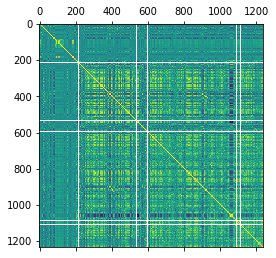

In [10]:
#checking out a correlation matrix with matplotlib
plt.matshow(df_data_1.corr())
#we notice that there is a great deal of variables which makes it hard to read!

In [11]:
#other stats
df_data_1.max()
df_data_1.min()
df_data_1.std()

Unnamed: 0                   941.802616
FIPS                       16375.524971
LACCESS_POP10              51254.806435
PCT_LACCESS_POP10             20.231676
LACCESS_LOWI10             13849.378974
PCT_LACCESS_LOWI10             8.212651
LACCESS_CHILD10            13155.181390
PCT_LACCESS_CHILD10            4.875273
LACCESS_SENIORS10           6519.993517
PCT_LACCESS_SENIORS10          4.212330
LACCESS_HHNV10              1120.253645
PCT_LACCESS_HHNV10             3.206407
REDEMP_SNAPS08             97745.876587
REDEMP_SNAPS12            125533.099779
PCH_REDEMP_SNAPS_08_12        35.284667
PCT_SNAP09                     3.139895
PCT_SNAP14                     3.519111
PCH_SNAP_09_14                 1.357692
PC_SNAPBEN08                   7.075854
PC_SNAPBEN10                   9.855525
PCH_PC_SNAPBEN_08_10          34.769849
SNAP_PART_RATE08              10.406635
SNAP_PART_RATE10               8.965901
SNAP_OAPP00                    0.000000
SNAP_OAPP05                    0.365205


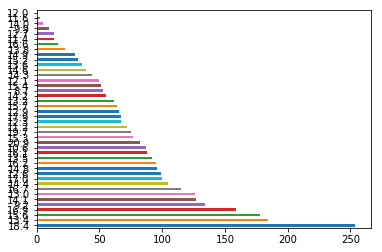

In [12]:
# Plot counts of a specified column using Pandas
df_data_1.FOODINSEC_10_12.value_counts().plot(kind='barh')

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


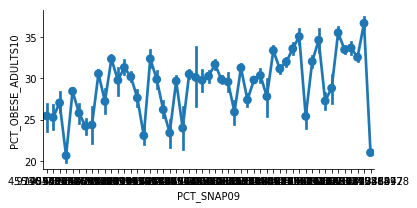

In [13]:
# Bar plot example
sns.factorplot("PCT_SNAP09", "PCT_OBESE_ADULTS10", data=df_data_1,size=3,aspect=2)

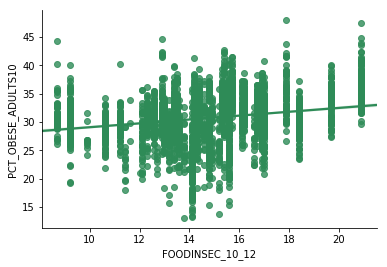

In [14]:
# Regression plot
sns.regplot("FOODINSEC_10_12", "PCT_OBESE_ADULTS10", data=df_data_1, robust=True, ci=95, color="seagreen")
sns.despine();

After looking at the data I realize that I'm only interested in seeing the connection between certain values and because the dataset is so large it's bringing in irrelevant information and creating noise. To change this, I created a smaller data frame, making sure to remove NaN and 0 values (0s in this dataset generally mean that a number was not recorded).

In [15]:
#create a dataframe of values that are most interesting to food insecurity
df_focusedvalues = df_data_1[["State", "County","PCT_REDUCED_LUNCH10", "PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", "FOODINSEC_10_12", "PCT_OBESE_CHILD11", "PCT_LACCESS_POP10", "PCT_LACCESS_CHILD10", "PCT_LACCESS_SENIORS10", "SNAP_PART_RATE10", "PCT_LOCLFARM07", "FMRKT13", "PCT_FMRKT_SNAP13", "PCT_FMRKT_WIC13", "FMRKT_FRVEG13", "PCT_FRMKT_FRVEG13", "PCT_FRMKT_ANMLPROD13", "FOODHUB12", "FARM_TO_SCHOOL", "SODATAX_STORES11", "State_y", "GROC12", "SNAPS12", "WICS12", "PCT_NHWHITE10", "PCT_NHBLACK10", "PCT_HISP10", "PCT_NHASIAN10", "PCT_65OLDER10", "PCT_18YOUNGER10", "POVRATE10", "CHILDPOVRATE10"]]

In [16]:
#remove NaNs and 0s
df_focusedvalues = df_focusedvalues[(df_focusedvalues != 0).all(1)]
df_focusedvalues = df_focusedvalues.dropna(how='any')

Before visualizing, a quick heatmap is created so that we can see what correlations we may want to visualize. I visualized a few of these relationships using seaborn, but I ultimately want to try out other visualizations. The quickest way to explore these is through Pixie Dust.

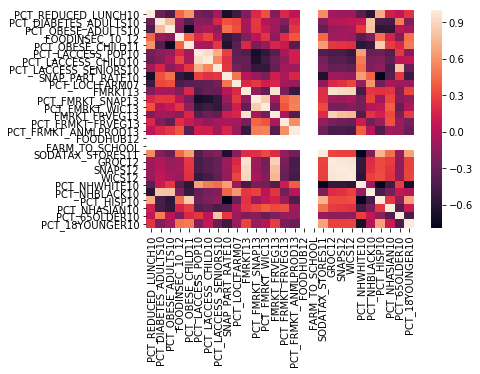

In [17]:
#look at heatmap of correlations with the dataframe to see what we should visualize
corr = df_focusedvalues.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can immediately see that a fair amount of strong correlations and relationships exist. Some of these include 18 and younger and Hispanic, an inverse relationship between Asian and obese, a correlation between sodatax and Hispanic, African American and obesity as well as food insecurity, sodatax and obese minors, farmers markets and aid such as WIC and SNAP, obese minors and reduced lunches and a few more.

Let's try and plot some of these relationships with seaborn.

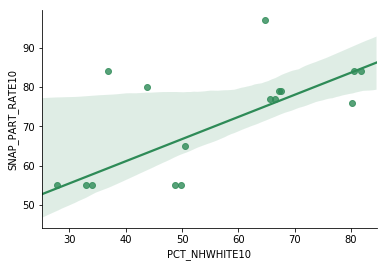

In [18]:
#Percent of the population that is white vs SNAP aid participation (positive relationship)
sns.regplot("PCT_NHWHITE10", "SNAP_PART_RATE10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

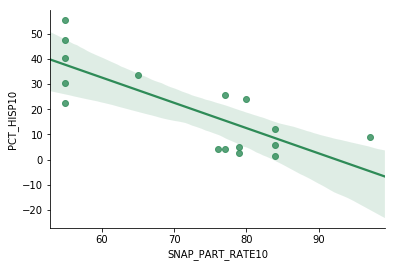

In [19]:
#Percent of the population that is Hispanic vs SNAP aid participation (negative relationship)
sns.regplot("SNAP_PART_RATE10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

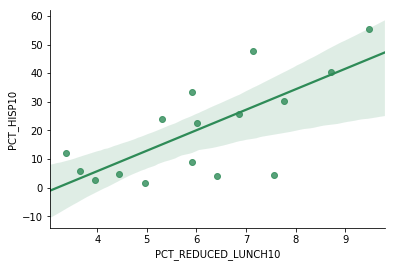

In [20]:
#Eligibility and use of reduced lunches in schools vs percent of the population that is Hispanic (positive relationship)
sns.regplot("PCT_REDUCED_LUNCH10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

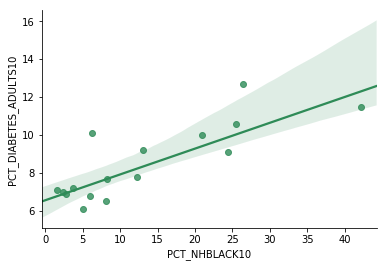

In [21]:
#Percent of the population that is black vs percent of the population with diabetes (positive relationship)
sns.regplot("PCT_NHBLACK10", "PCT_DIABETES_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

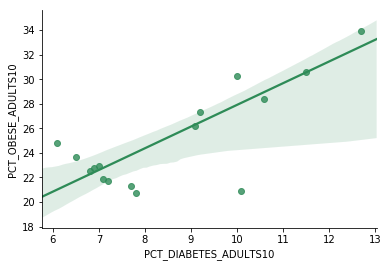

In [22]:
#Percent of population with diabetes vs percent of population with obesity (positive relationship)
sns.regplot("PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

### Now, let's visualize with Pixie Dust.

Now that we've gained some initial insights, let's try out a different tool: Pixie Dust!

As you can see in the notebook below, to activate Pixie Dust, we just import it and then write:

 ```display(your_dataframe_name)```
 
After doing this your dataframe will show up in a column-row table format. To visualize your data, you can click the chart icon at the top left (looks like an arrow going up). From there you can choose from a variety of visuals. Once you select the type of chart you want, you can then select the variables you want to showcase. It's worth playing around with this to see how you can create the most effective visualizations for your audience. The notebook below showcases a couple options such as scatterplots, bar charts, line charts, and histograms.

In [23]:
import pixiedust

Pixiedust database opened successfully


In [ ]:
#looking at the dataframe table. Pixie Dust does this automatically, but to find it again you can click the table icon.
display(df_focusedvalues)

State,County,PCT_REDUCED_LUNCH10,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS10,FOODINSEC_10_12,PCT_OBESE_CHILD11,PCT_LACCESS_POP10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,SNAP_PART_RATE10,PCT_LOCLFARM07,FMRKT13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,FMRKT_FRVEG13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,FOODHUB12,FARM_TO_SCHOOL,SODATAX_STORES11,State_y,GROC12,SNAPS12,WICS12,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE10,CHILDPOVRATE10
CA,Alameda,6.0011621150493895,7.8,20.7,15.6,16.6,10.6222597614563,2.54294882103569,1.1571693963993102,55.00000000000001,5.5,37.0,65.0,72.97297297297297,26.0,70.27027027027027,48.64864864864865,1.0,1.0,7.25,CA,366.0,870.2499999999997,187.0,34.070640000000004,12.191587,22.505166,25.857876,11.107013,22.553634,13.5,17.2
CA,Los Angeles,7.136957141307829,7.7,21.3,15.6,18.5,6.2479247200959405,1.5241164284723898,0.803809896814703,55.00000000000001,9.7,117.0,33.0,35.8974358974359,49.0,41.88034188034188,39.31623931623932,1.0,1.0,7.25,CA,2054.0,6466.666666666662,1602.0,27.787257,8.301444,47.74496,13.501623,10.853874000000001,24.465879,17.6,24.5
CA,Monterey,9.479391439731225,6.9,22.8,15.6,18.8,11.9120399316319,2.96970303425362,1.51244095349345,55.00000000000001,7.7,16.0,31.0,50.0,9.0,56.25,31.25,1.0,1.0,7.25,CA,116.0,269.75000000000017,93.0,32.871389,2.722518,55.414798,5.728611,10.702625999999999,26.746446999999996,17.1,25.9
CA,Ventura,8.702192225187046,7.1,21.9,15.6,18.7,15.4597874141821,3.805880704892,2.07853415773462,55.00000000000001,7.4,11.0,45.0,63.63636363636363,6.0,54.54545454545454,63.63636363636363,1.0,1.0,7.25,CA,176.0,413.5,125.0,48.689328,1.5889360000000001,40.272046,6.570850999999999,11.697667,25.739143,11.0,15.3
CA,Yolo,7.768100346369843,7.0,22.9,15.6,16.1,9.397743241139793,2.20176075920737,1.1007749408272298,55.00000000000001,9.7,6.0,100.0,100.0,6.0,100.0,83.33333333333334,1.0,1.0,7.25,CA,39.0,135.16666666666666,33.0,49.90814,2.365957,30.347673999999998,12.765808999999999,9.843713000000001,22.719058,16.4,18.9
FL,Collier,6.86409282602111,10.1,20.9,14.8,20.0,27.998545273972802,4.99946377158533,9.163102127953891,77.0,6.8,6.0,17.0,16.666666666666664,4.0,66.66666666666666,50.0,1.0,1.0,6.0,FL,62.0,211.33333333333337,36.0,65.674297,6.188729,25.86993,1.054367,26.421684000000003,19.484635,15.7,26.3
FL,Jackson,7.567641807444033,12.7,33.9,14.8,10.8,6.81381406124234,1.3529093751738102,1.08367507057799,77.0,5.5,2.0,100.0,100.0,1.0,50.0,100.0,1.0,1.0,6.0,FL,6.0,49.91666666666667,10.0,66.560125,26.345837,4.307884,0.456318,15.681663,19.915169,19.0,27.0
IL,Cook,5.29954174514276,9.1,26.2,13.0,15.8,7.992797225208251,1.9531527799936899,1.08132200590351,80.0,13.6,131.0,41.0,8.396946564885496,79.0,60.30534351145039,29.00763358778626,1.0,1.0,6.25,IL,1559.0,3740.5833333333367,926.0,43.859491,24.366837,23.962269,6.138382,11.941633,23.721985,16.8,24.5
NY,Tompkins,6.4115911851466265,7.2,21.7,13.2,12.4,17.595649957466897,2.1439247879870003,1.43431358677926,76.0,14.3,6.0,50.0,50.0,6.0,100.0,83.33333333333334,1.0,1.0,4.0,NY,21.0,57.25,11.0,80.235123,3.714899,4.198338,8.546335000000001,10.760703,16.402465,19.6,15.4
OH,Franklin,4.438555813183173,10.0,30.3,16.1,13.4,23.6924610241527,6.283173292764388,2.49847383726503,79.0,11.9,33.0,18.0,45.45454545454545,19.0,57.57575757575758,69.6969696969697,1.0,1.0,5.5,OH,263.0,896.5833333333335,197.0,67.306049,20.989949,4.789181,3.844117,9.945385,23.941778,18.8,25.5



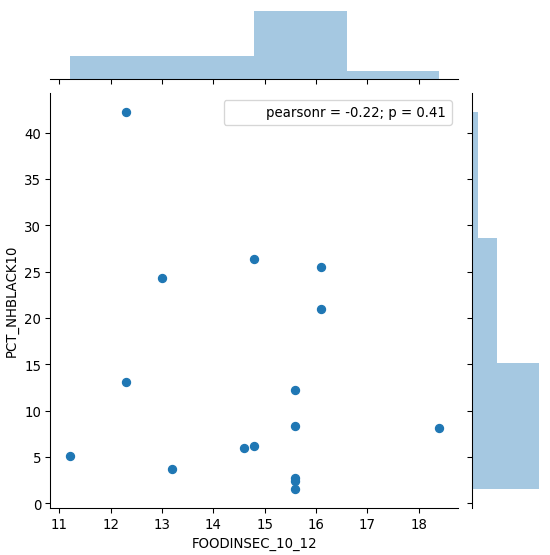

In [ ]:
#using seaborn in Pixie Dust to look at Food Insecurity and the Percent of the population that is black in a scatter plot
display(df_focusedvalues)


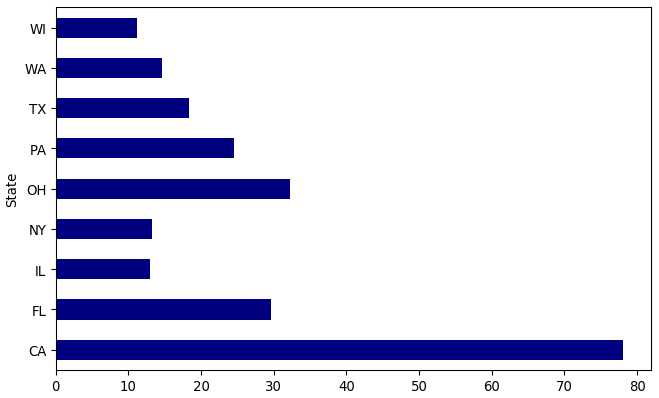

In [ ]:
#using matplotlib in Pixie Dust to view Food Insecurity by state in a bar chart
display(df_focusedvalues)

In [ ]:
#using bokeh in Pixie Dust to view the percent of the population that is black vs the percent of the population that is obese in a line chart
display(df_focusedvalues)


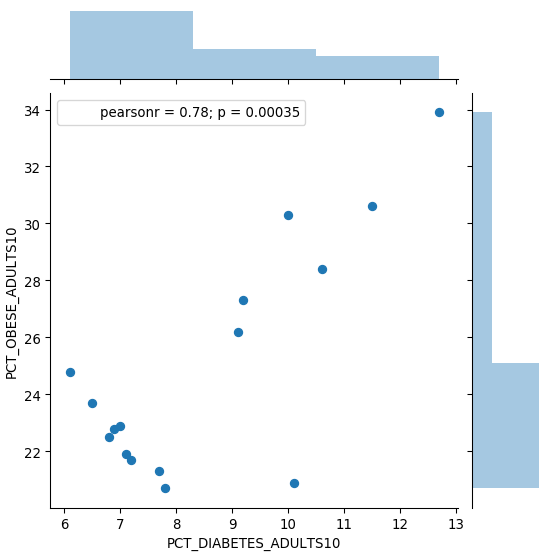

In [ ]:
#using seaborn in Pixie Dust to view obesity vs diabetes in a scatterplot
display(df_focusedvalues)


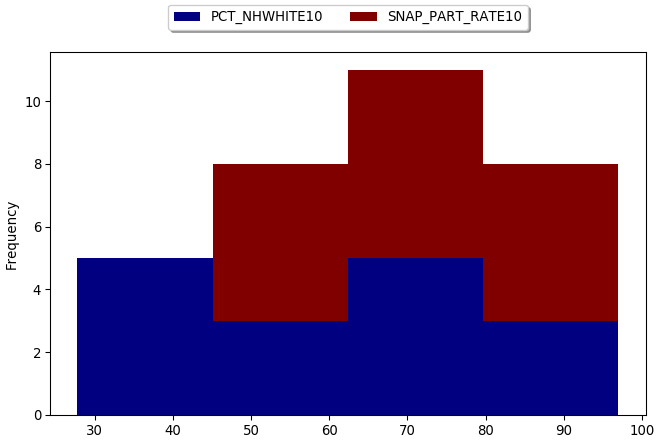

In [ ]:
#using matplotlib in Pixie Dust to view the percent of the population that is white vs SNAP participation rates in a histogram
display(df_focusedvalues)

In [ ]:
#using bokeh in Pixie Dust to view the trends in obesity, diabetes, food insecurity and the percent of the population that is black in a line graph
display(df_focusedvalues)


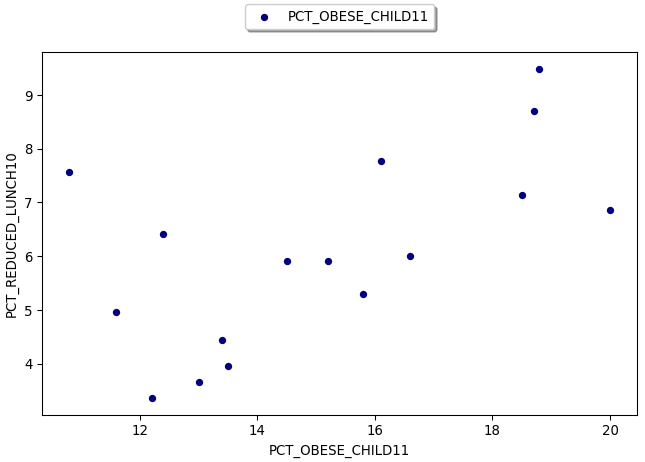

In [31]:
#using matplotlib in Pixie Dust to view childhood obesity vs reduced school lunches in a scatterplot
display(df_focusedvalues)

### Let's download our dataframe and work with it on Watson Analytics.

Once you follow along, you can take the new .csv (found under "Data Services" --> "Object Storage" from the top button) and upload it to Watson Analytics. Again, if you do not have an account, you'll want to set one up. Once you are logged in and ready to go, you can upload the data (saved in this repo as df_focusedvalues.csv) to your Watson platform. 

In [41]:
#First get your credentials by going to the "1001" button again and under your csv file selecting "Insert Credentials". 
#The cell below will be hidden because it has my personal credentials so go ahead and insert your own.
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IBM_API_KEY_ID': '-9FQb_5uaEltHpWcqXkeVsFIShUoUOJht768ihN-VgYq',
    'IAM_SERVICE_ID': 'iam-ServiceId-c8681118-cbee-4807-9adf-ac48dfd1cfdd',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'testpixiestorage302e1eb2addc4a09a8e6c82f7f1ae0e3',
    'FILE': 'combined_data.csv'
}

In [42]:
df_focusedvalues.to_csv('df_focusedvalues.csv',index=False)

In [43]:
import ibm_boto3  
from ibm_botocore.client import Config  

cos = ibm_boto3.client(service_name='s3',  
 ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],  
 ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],  
 ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],  
 config=Config(signature_version='oauth'),  
 endpoint_url=credentials_1['ENDPOINT'])  

cos.upload_file(Filename='df_focusedvalues.csv',Bucket=credentials_1['BUCKET'],Key='df_focusedvalues.csv')  


 Once this is complete, go get your csv file from Data Services, Object Storage! (Find this above! ^)

### Using Watson to visualize our insights.

Once you've set up your account, you can see that the Watson plaform has three sections: data, discover and display. You uploaded your data to the "data" section, but now you'll want to go to the "discover" section. Under "discover" you can select your dataframe dataset for use. Once you've selected it, the Watson platform will suggest different insights to visualize. You can move forward with its selections or your own, or both. You can take a look at mine here (you'll need an account to view): https://ibm.co/2xAlAkq or see the screen shots attached to this repo. You can also go into the "display" section and create a shareable layout like mine (again you'll need an account): https://ibm.co/2A38Kg6.

You can see that with these visualizations the user can see the impact of food insecurity by state, geographically distributed and used aid such as reduced school lunches, a map of diabetes by state, a predictive model for food insecurity and diabetes (showcasing the factors that, in combination, suggest a likelihood of food insecurity), drivers of adult diabetes, drivers of food insecurity, the relationship with the frequency of farmers market locations, food insecurity and adult obesity, as well as the relationship between farmers markets, the percent of the population that is Asian, food insecurity and poverty rates.

By reviewing our visualizations both in DSX and Watson, we learn that obesity and diabetes almost go hand in hand, along with food insecurity. We can also learn that this seems to be an inequality issue, both in income and race, with Black and Hispanic populations being more heavily impacted by food insecurity and diet-related diseases than those of the White and Asian populations. We can also see that school-aged children who qualify for reduced lunch are more likely obese than not whereas those that have a farm-to-school program are more unlikely to be obese.

Like many data science investigations, this analysis could have a big impact on policy and people's approach to food insecurity in the U.S. What's best is that we can create many projects much like this in a quick time period and share them with others by using Pandas, Pixie Dust as well as Watson's predictive and recommended visualizations.